# Integrantes

* *Jorge Ñancupil*
* *Luis Lagos*
* *Josue Avila*

`# Inserte aca las librerias y dependencias necesarias para el desarrollo del ejercicio:`




In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy.stats import spearmanr, kendalltau
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression as LogisticRegressionSK
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_classif


`# Inserte aca la lectura del archivo a utilizar en el desarrollo del ejercicio:`

In [87]:
df1 = pd.read_excel('../Base_clientes_Monopoly.xlsx', 'Transición de Negocio', skiprows=[0])

#df1 = pd.read_excel('/content/data/Base_clientes_Monopoly.xlsx', 'Transición de Negocio', skiprows=[0])

df1

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,...,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,H,13.0,51,364978.0,57,1,1,1,...,300000,0.0,478320.0,0.0,478320.0,12668,0.0,R,0,NaN
51120,51121,170,H,13.0,51,625376.0,39,1,0,0,...,166098,0.0,166098.0,0.0,0.0,572363,0.0,R,0,NaN
51121,51122,160,H,13.0,47,806220.0,153,1,1,0,...,18891,0.0,9652.0,0.0,9652.0,16241,0.0,R,0,NaN
51122,51123,160,M,13.0,47,NaN,11,1,0,0,...,26528,0.0,24638.0,0.0,24638.0,84982,0.0,R,0,NaN


`# Utilice un ejemplo de vectores a partir de los datos:`

In [88]:
#En esta linea de codigo usaremos la columna Subsegmento para mostrar un vector

df1['Subsegmento']

0        160
1        160
2        170
3        151
4        170
        ... 
51119    160
51120    170
51121    160
51122    160
51123    170
Name: Subsegmento, Length: 51124, dtype: int64

`# Utilice un ejemplo de matrices a partir de los datos:`

In [89]:
df_matriz = df1.iloc[:, 0:2]
df_matriz

,Id,Subsegmento
0,1,160
1,2,160
2,3,170
3,4,151
4,5,170
...,...,...
51119,51120,160
51120,51121,170
51121,51122,160
51122,51123,160


`# Utilice un ejemplo de media, a partir de una de las columnas a su elección:`

In [90]:
df1['Edad'].mean()

38.70287927392223

`# Utilice un ejemplo de media recortada, a partir de una de las columnas a su elección:`

In [91]:
stats.trim_mean(df1['Edad'], 0.1)

37.055721271393644

`# Utilice un ejemplo de mediana, a partir de una de las columnas a su elección:`

In [92]:
df1['Edad'].mean()

38.70287927392223

`# Utilice un ejemplo de rango intercuartil, a partir de una de las columnas a su elección:`

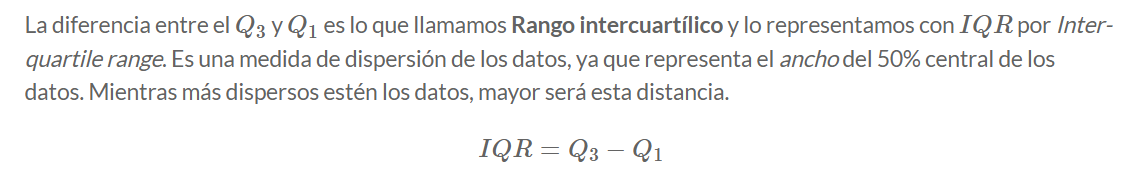

El rango en donde esta la concentración de datos de los intercuartiles ronda entre los 20.000 y 32.000 aproximadamente.

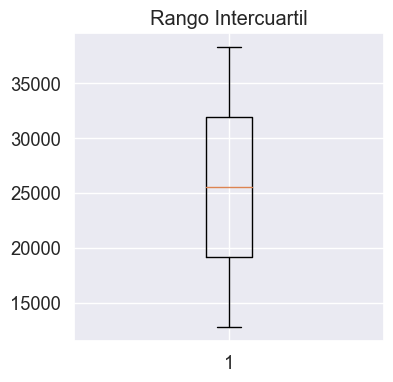

In [93]:
q1 = df1['Renta'].quantile(0.25)
q3 = df1['Renta'].quantile(0.75)
iqr = q3 - q1
iqr

df1_q1 = int(df1['Id'].count().sum() * 0.25)
df1_q2 = int(df1['Id'].count().sum() * 0.75)

df_iqr = df1.iloc[df1_q1:df1_q2, 0]

fig1, axs = plt.subplots(figsize=(4,4))

axs.set_title('Rango Intercuartil')
axs.boxplot(df_iqr)

plt.show()

`# Utilice un ejemplo de datos faltantes, mediante imputación de las columnas a su elección:`

In [94]:
#Cantidad de datos nulos dentro de la columna Renta
df1['Renta'].isnull().sum()

13365

A continuación se realizó la imputación de datos de la columna Renta con el método fillna usando su promedio.
Con esto se pudo eliminar por completo los datos nulos de la columna.

## Imputaciones de datos
Utilizaremos ciertas columnas, las cuales son:
* "Id"
* "Subsegmento"
* "Sexo"
* "Region"
* "Edad"
* "Renta"
* "Antiguedad"
* "Internauta"
* "Adicional"
* "Dualidad"
* "Monoproducto"
* "Ctacte"
* "Consumo"
* "Hipotecario"
* "Debito"
* "CambioPin"
* "Cuentas"
* "TC"
* "target"

Las cuales analizaremos y realizaremos una imputacion de datos a la columna que la necesite.

In [95]:
# Creamos el nuevo DataFrame que usaremos

df1_new = df1.copy()
df1_new = df1_new.loc[:,["Id","Subsegmento", "Sexo","Region","Edad","Renta","Antiguedad","Internauta","Adicional","Dualidad",
"Monoproducto","Ctacte","Consumo","Hipotecario","Debito","CambioPin","Cuentas",
"TC", "target"]]


In [96]:
# Realizaremos una cuenta para saber que columnas tienen datos nulos

df1_new.isnull().sum()

Id                  0
Subsegmento         0
Sexo                1
Region             53
Edad                0
Renta           13365
Antiguedad          0
Internauta          0
Adicional           0
Dualidad            0
Monoproducto        0
Ctacte              0
Consumo             0
Hipotecario         0
Debito              0
CambioPin       19388
Cuentas             0
TC                  0
target              0
dtype: int64

In [97]:
# Realizaremos una cuenta para saber que columnas tienen datos Na

df1_new.isna().sum()

Id                  0
Subsegmento         0
Sexo                1
Region             53
Edad                0
Renta           13365
Antiguedad          0
Internauta          0
Adicional           0
Dualidad            0
Monoproducto        0
Ctacte              0
Consumo             0
Hipotecario         0
Debito              0
CambioPin       19388
Cuentas             0
TC                  0
target              0
dtype: int64

In [98]:
encoder = LabelEncoder()

df1_new['Sexo_Encoded'] = encoder.fit_transform(df1_new["Sexo"])
df1_new = df1_new.drop(["Sexo"], axis=1)

# 1 = M, 0 = H
df1_new['Sexo_Encoded']

0        1
1        0
2        0
3        0
4        0
        ..
51119    0
51120    0
51121    0
51122    1
51123    0
Name: Sexo_Encoded, Length: 51124, dtype: int32

Se utilizo el imputador SimpleImputer para imputar los datos faltantes dentro del DataFrame

In [99]:

columns = df1_new.columns
imputer = SimpleImputer(strategy="mean")

df1_new = imputer.fit_transform(df1_new)

df1_new = pd.DataFrame(df1_new, columns=columns)



### Se pueden visualizar los datos de Renta

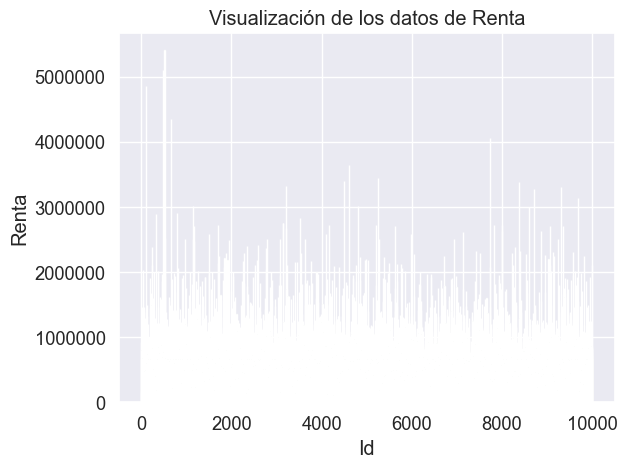

In [100]:
plt.bar(df1_new['Id'][:10000], df1_new['Renta'][:10000], color='green')
plt.xlabel('Id')
plt.ylabel('Renta')
plt.title('Visualización de los datos de Renta')
plt.ticklabel_format(style='plain')
plt.grid(True)
plt.show()

Se creara un escalador MinMaxScaler para poder escalar la columna "Renta", esta sera una nueva columna llamada "Renta_Scaled" que es la columna la cual usaremos a partir de ahora en lugar de "Renta"

In [101]:
scaler = MinMaxScaler()
df1_new['Renta_Scaled'] = scaler.fit_transform(df1_new[['Renta']])
df1_new = df1_new.drop("Renta", axis=1)
df1_new

,Id,Subsegmento,Region,Edad,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,target,Sexo_Encoded,Renta_Scaled
0,1.0,160.0,13.0,43.0,130.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,0.050658
1,2.0,160.0,13.0,46.0,69.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.010974
2,3.0,170.0,13.0,45.0,24.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.070982
3,4.0,151.0,13.0,46.0,134.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.013175
4,5.0,170.0,13.0,46.0,116.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,3.0,0.0,0.0,0.061520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120.0,160.0,13.0,51.0,57.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,0.0,0.027884
51120,51121.0,170.0,13.0,51.0,39.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.047777
51121,51122.0,160.0,13.0,47.0,153.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.061594
51122,51123.0,160.0,13.0,47.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.050658


In [102]:
df1_new.isna().sum()

Id              0
Subsegmento     0
Region          0
Edad            0
Antiguedad      0
Internauta      0
Adicional       0
Dualidad        0
Monoproducto    0
Ctacte          0
Consumo         0
Hipotecario     0
Debito          0
CambioPin       0
Cuentas         0
TC              0
target          0
Sexo_Encoded    0
Renta_Scaled    0
dtype: int64

In [103]:
# Se rellenan los campos de la columna "CambioPin" y "Region" con la media
a = df1_new["CambioPin"]
b = df1_new["Region"]
mean_a = a.mean()
mean_b = b.mean()

df1_new = df1_new.fillna({"CambioPin":mean_a})
df1_new = df1_new.fillna({"Region":mean_b})

df1_new.isna().sum()

Id              0
Subsegmento     0
Region          0
Edad            0
Antiguedad      0
Internauta      0
Adicional       0
Dualidad        0
Monoproducto    0
Ctacte          0
Consumo         0
Hipotecario     0
Debito          0
CambioPin       0
Cuentas         0
TC              0
target          0
Sexo_Encoded    0
Renta_Scaled    0
dtype: int64

# Clasificación
logramos identificar las siguientes clasificaciones: Clasificación binaria: clasificar los datos en dos clases, como sí o no, positivo o negativo.
Clasificación multiclase: clasificar los datos en más de dos clases.

### Datos de Entrenamiento y Pruebas

In [104]:
mayor = df1_new["Edad"].mean()

df1_new["Edad_Mayor"] = 0  
df1_new.loc[df1_new["Edad"] > mayor, "Edad_Mayor"] = 1 

Las variables que ocupamos y definimos son "Edad", "Antigüedad" y se creo la variable "Edad_Mayor" definiendolos como un 1 si es que es mayor a la media de edad y con 0 si es menor

"X" como la variable que contendrá todos los datos que la máquina deberá analizar

"y" será definida como la variable a predecir

In [105]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X = df1_new[["Edad_Mayor", "Sexo_Encoded"]]  # Características
y = df1_new["target"]    # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

### Entrenamiento del Modelo
Ocupamos el algoritmo de SVC para el aprendizaje automático supervisado que se utiliza para la clasificación.

In [106]:
C = 5.0  # Valor de ajuste
clf = svm.SVC(C = C, kernel="linear")
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)


print(f"Precisión del modelo SVM lineal: {round(accuracy * 100, 2)}%")

Precisión del modelo SVM lineal: 90.94%


"accuracy_score" es una métrica de evaluación que mide la proporción de predicciones correctas realizadas por un modelo.

## Matriz de Confusion

Aqui usamos la matriz de confusion que describe el rendimiento de un modelo supervisado, los cuales dan a conocer los 
* FP (False Positive) 
* TN (True Negatives)
* FN (False Negatives)
* TP (True Positives)

El escenario ideal que todos queremos es que el modelo dé 0 Falsos positivos y 0 Falsos Negativos. 

In [107]:
# Calculamos la matriz de confusión
matriz_confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(f"Verdaderos Positivos: {matriz_confusion[0][0]}")
print(f"Falsos Positivos: {matriz_confusion[0][1]}")
print(f"Verdaderos Negativos: {matriz_confusion[1][0]}")
print(f"Falsos Negativos: {matriz_confusion[1][1]}")
print("Matriz de Confusión:")
print(matriz_confusion)

Verdaderos Positivos: 27895
Falsos Positivos: 0
Verdaderos Negativos: 2780
Falsos Negativos: 0
Matriz de Confusión:
[[27895     0]
 [ 2780     0]]


# Regresión Logistica
Usamos la regresión logística, ya que es un algoritmo de clasificación que se utiliza para predecir la probabilidad de una variable dependiente categórica y con ella hacer un análisis predictivo.

In [108]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        z = np.dot(X, self.theta)
        return np.round(self.sigmoid(z))

### Datos de Entrenamiento y Pruebas

In [109]:
# Se saca la media de la columna Renta_Scaled
renta_promedio = df1_new["Renta_Scaled"].mean()

# Crea una columna llamada "Renta_Mayor" donde se inicializa un valor donde todos tienen una renta menor a la media
df1_new['Renta_Mayor'] = 0

#Si tiene una renta mayor a la media lo marca con un 1
df1_new.loc[df1_new['Renta_Scaled'] > renta_promedio, 'Renta_Mayor'] = 1 

In [110]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X = df1_new[["Renta_Mayor", "TC", "Dualidad"]]
y = df1_new["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenamiento del Modelo

In [111]:
clf = LogisticRegression(learning_rate=0.2, num_iterations=1500)
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo Regresion Logistica: {round(accuracy * 100, 2)}%")

Precisión del modelo Regresion Logistica: 90.56%


In [112]:
# LogisticRegressionSK es el modelo de regresion logistica de la libreria Sklearn
clf = LogisticRegressionSK(max_iter=1000)
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo Regresion Logistica: {round(accuracy * 100, 2)}%")

Precisión del modelo Regresion Logistica: 90.56%


## Matriz de confusion del modelo Regresion Logistica

In [113]:
# Establecemos un umbral para la clasificación
umbral = 0.5
y_pred_clasificado = (y_pred > umbral).astype(int)

# Calculamos la matriz de confusión
matriz_confusion = confusion_matrix(y_true=y_test, y_pred=y_pred_clasificado)


print(f"Verdaderos Positivos: {matriz_confusion[0][0]}")
print(f"Falsos Positivos: {matriz_confusion[0][1]}")
print(f"Falsos Negativos: {matriz_confusion[1][0]}")
print(f"Verdaderos Negativos: {matriz_confusion[1][1]}")
print("Matriz de Confusión:")
print(matriz_confusion)


Verdaderos Positivos: 9260
Falsos Positivos: 0
Falsos Negativos: 965
Verdaderos Negativos: 0
Matriz de Confusión:
[[9260    0]
 [ 965    0]]


# Correlacion

## Spearman

Correlación de Searmanr entre Edad y Subsegmento: -0.6018046083816241


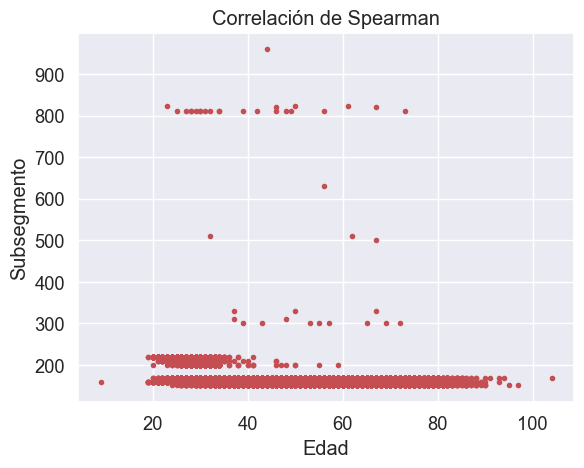

In [114]:
df_test = df1_new.loc[:,["Edad", "Subsegmento"]]
correlation_spearmanr, p_value = spearmanr(df_test.iloc[:, 0], df_test.iloc[:, 1])


print("Correlación de Searmanr entre Edad y Subsegmento:", correlation_spearmanr)

plt.plot(df_test.iloc[:, 0], df_test.iloc[:, 1], "r.")
plt.xlabel('Edad')
plt.ylabel('Subsegmento')
plt.title('Correlación de Spearman')

plt.grid(True)
plt.show()

# Kendall

Correlación Tau de Kendall = -0.05
Valor p = 0.0000


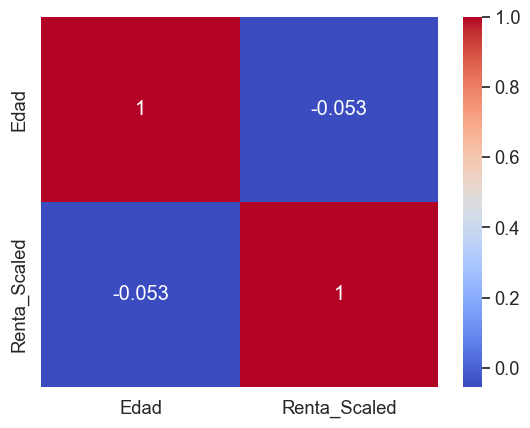

In [115]:
correlation_kendalltau, p_value = kendalltau(df1_new.loc[:, "Region"], df1_new.loc[:, "Subsegmento"])



labels = ['Edad', 'Renta_Scaled']
correlation_matrix = np.array([[1, correlation_kendalltau],[correlation_kendalltau, 1]])

sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels)

print(f'Correlación Tau de Kendall = {correlation_kendalltau:.2f}')
print(f'Valor p = {p_value:.4f}')

plt.grid()
plt.show()

# Pearson

Correlación de Pearson entre Edad y Renta_Scaled:  0.007871439189273032


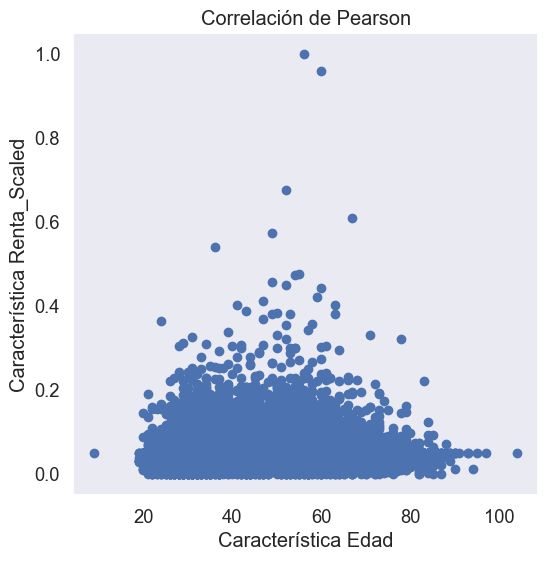

In [116]:
correlation = np.corrcoef(df1_new.loc[:, "Subsegmento"], df1_new.loc[:, "Renta_Scaled"])[0, 1]

print("Correlación de Pearson entre Edad y Renta_Scaled: ", correlation)

plt.figure(figsize=(6, 6))
plt.scatter(df1_new.loc[:, "Edad"], df1_new.loc[:, "Renta_Scaled"], label=f'Correlación = {correlation:.2f}')
plt.xlabel('Característica Edad')
plt.ylabel('Característica Renta_Scaled')
plt.title('Correlación de Pearson')

plt.grid()
plt.show()

# Clasificación Multi-clase

In [117]:
X = df1_new.loc[:, ["Edad", "Sexo_Encoded"]]
y = df1_new.loc[:, "Subsegmento"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

svm_classifier_ovo = svm.SVC(kernel='linear', decision_function_shape='ovo', random_state=42)

# Entrenar el clasificador
svm_classifier_ovo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier_ovo.predict(X_test)

# print(X_feat)
print(y_pred)

# Calcular la precisión
accuracy_ovo = accuracy_score(y_train, y_pred)
print(f'Precisión: {accuracy_ovo}')

[170. 160. 220. ... 160. 160. 170.]
Precisión: 0.2887489241843361


# Arboles de Decisión
El árbol de decisiones se usa para mostrar las diferentes ramas de predicciones de analítica de datos  basados en su clasificación según ciertas características o propiedades, o en la regresión mediante la relación entre distintas variables para predecir el valor de otra.

### Datos de Entrenamiento y Pruebas

In [118]:
# Se crea una copia del DataFrame
X = df1_new.loc[:, ["Sexo_Encoded", "Debito", "TC", "CambioPin"]]

# Se crea una Serie con la columna Subsegmento
y = df1_new["target"]

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

### Entrenamiento del Modelo

In [119]:
# Crea un modelo de árbol de decisión

clf = DecisionTreeClassifier()

# Entrena el modelo en el conjunto de entrenamiento
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del árbol de decisión : {round(accuracy * 100, 2)}%")

Precisión del árbol de decisión : 90.9%


## Representacion del Arbol de Decisión

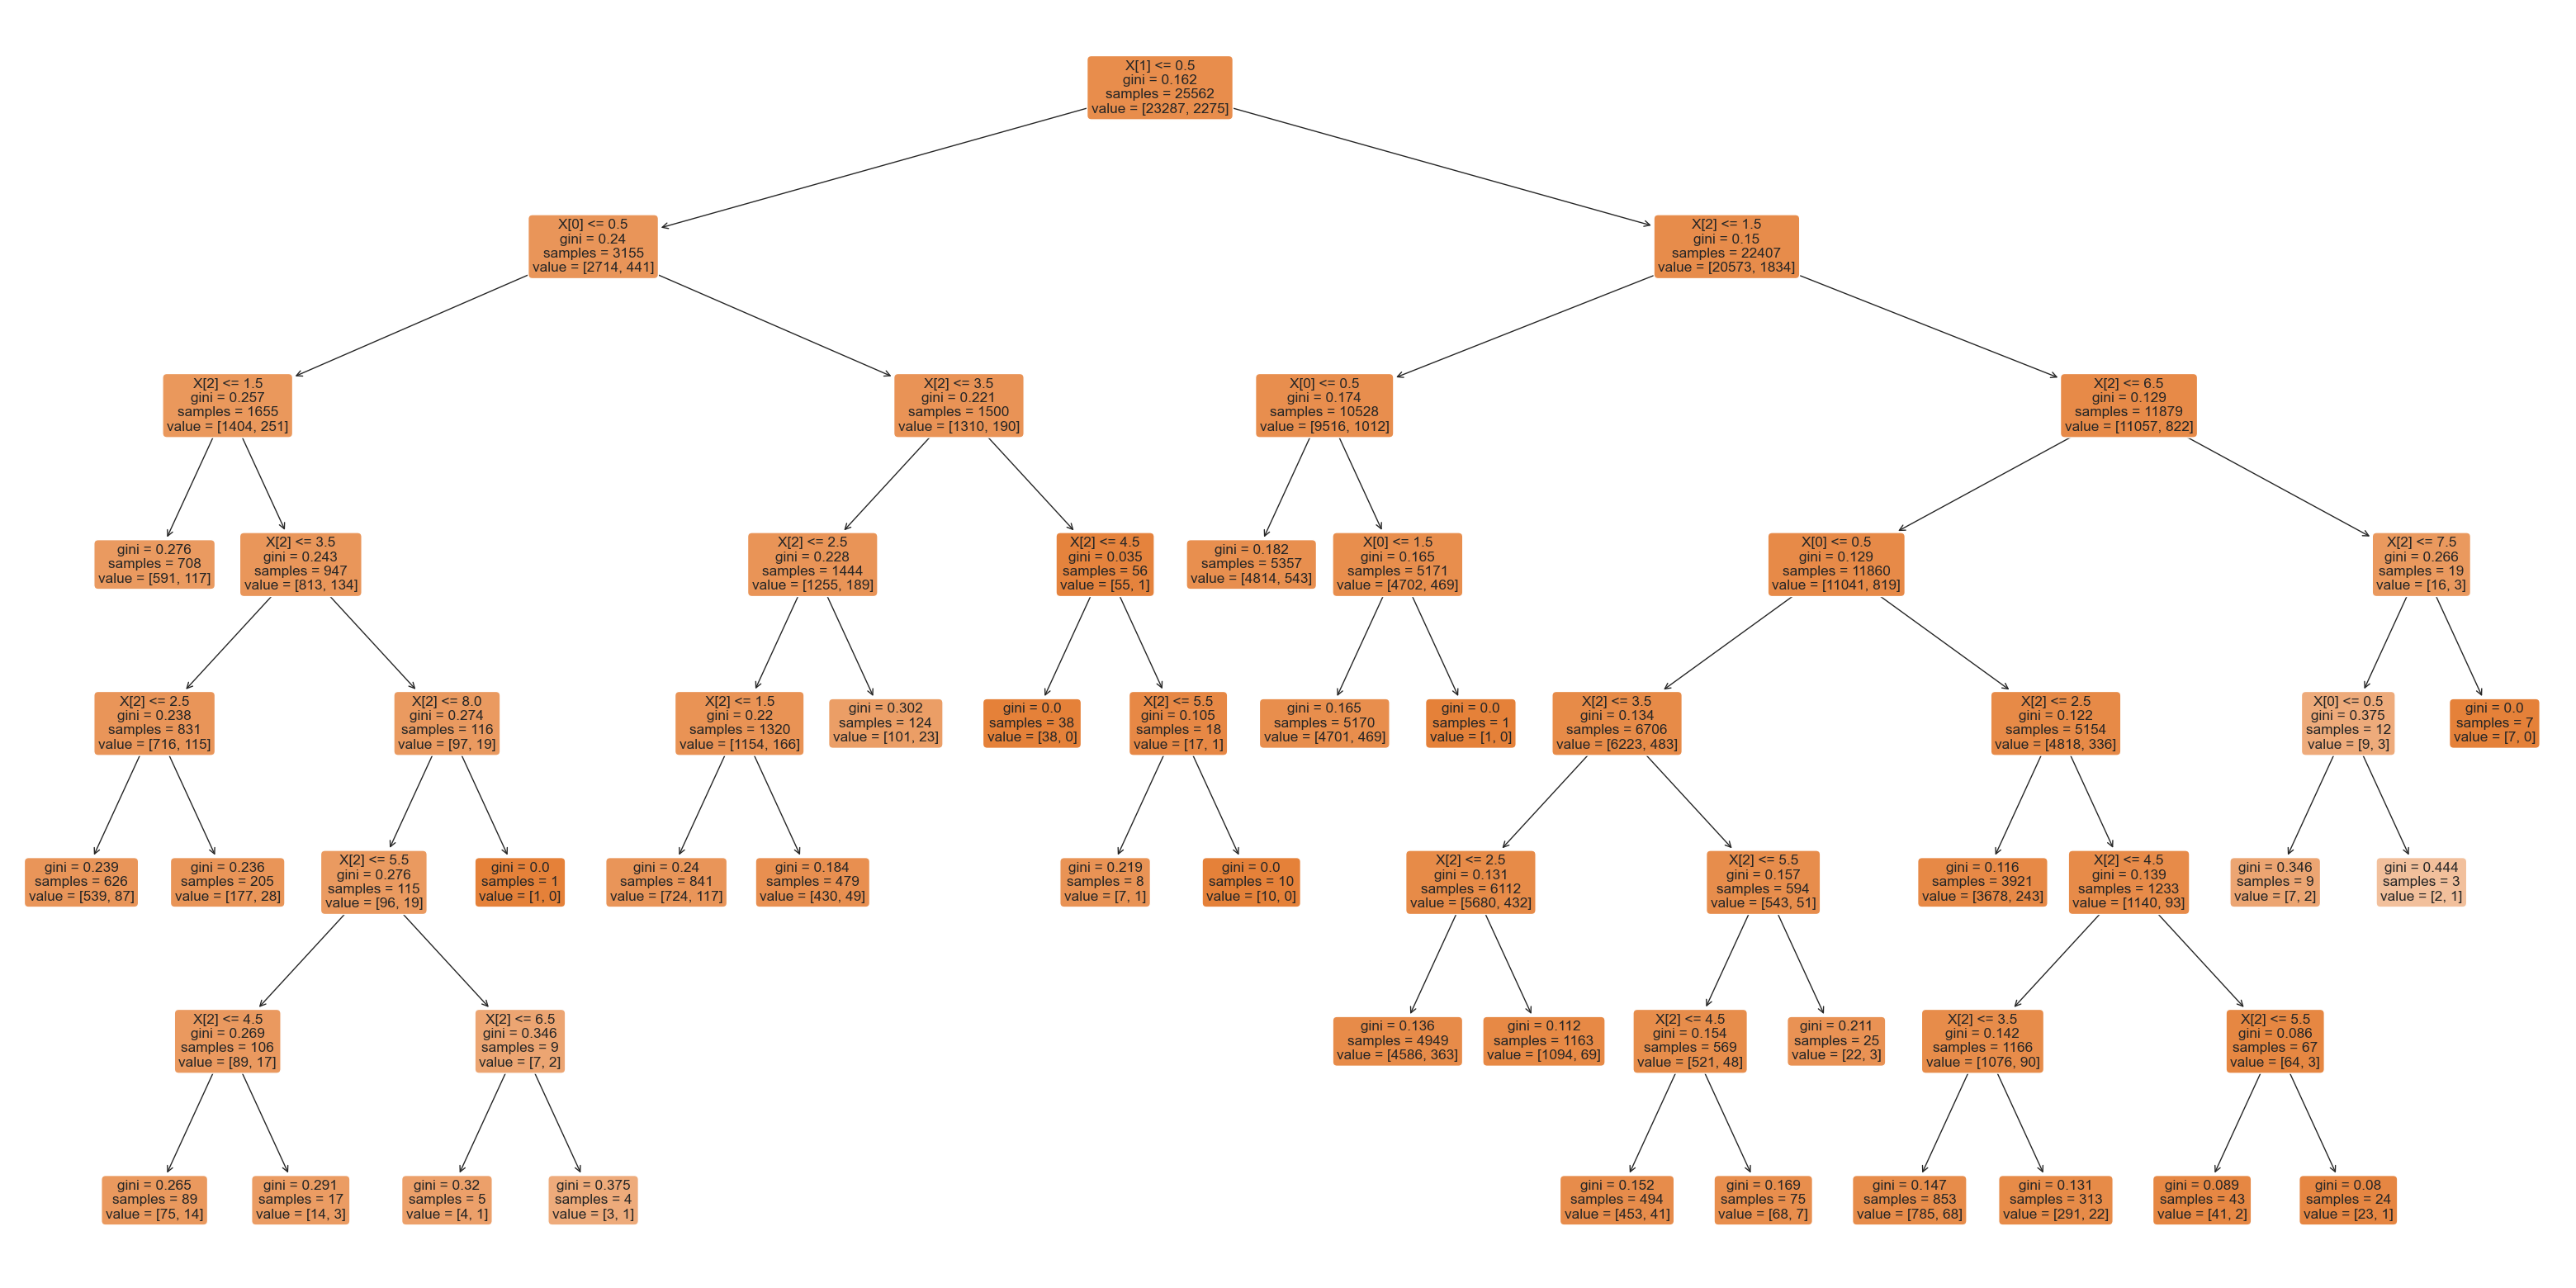

In [120]:
# Se dibuja la figura del arbol de decision

iris = load_iris()

fig = plt.figure(figsize=(40,20))

tree.plot_tree(clf,
               rounded=True, 
               filled = True);


## Matriz de confusion del Arbol de Decision

In [121]:
# Establecemos un umbral para la clasificación
umbral = 0.5
y_pred_clasificado = (y_pred > umbral).astype(int)

# Calculamos la matriz de confusión
matriz_confusion = confusion_matrix(y_true=y_test, y_pred=y_pred_clasificado)


print(f"Verdaderos Positivos: {matriz_confusion[0][0]}")
print(f"Falsos Positivos: {matriz_confusion[0][1]}")
print(f"Falsos Negativos: {matriz_confusion[1][0]}")
print(f"Verdaderos Negativos: {matriz_confusion[1][1]}")
print("Matriz de Confusión:")
print(matriz_confusion)

Verdaderos Positivos: 23237
Falsos Positivos: 0
Falsos Negativos: 2325
Verdaderos Negativos: 0
Matriz de Confusión:
[[23237     0]
 [ 2325     0]]


# Criterios de Splitting

Puntuaciones de características:
Característica 1: 589.32
Característica 2: 0.24
Característica 3: 219.27
Característica 4: 262.50
Característica 5: 0.31

Características seleccionadas (índices): [0 1 2 3 4]


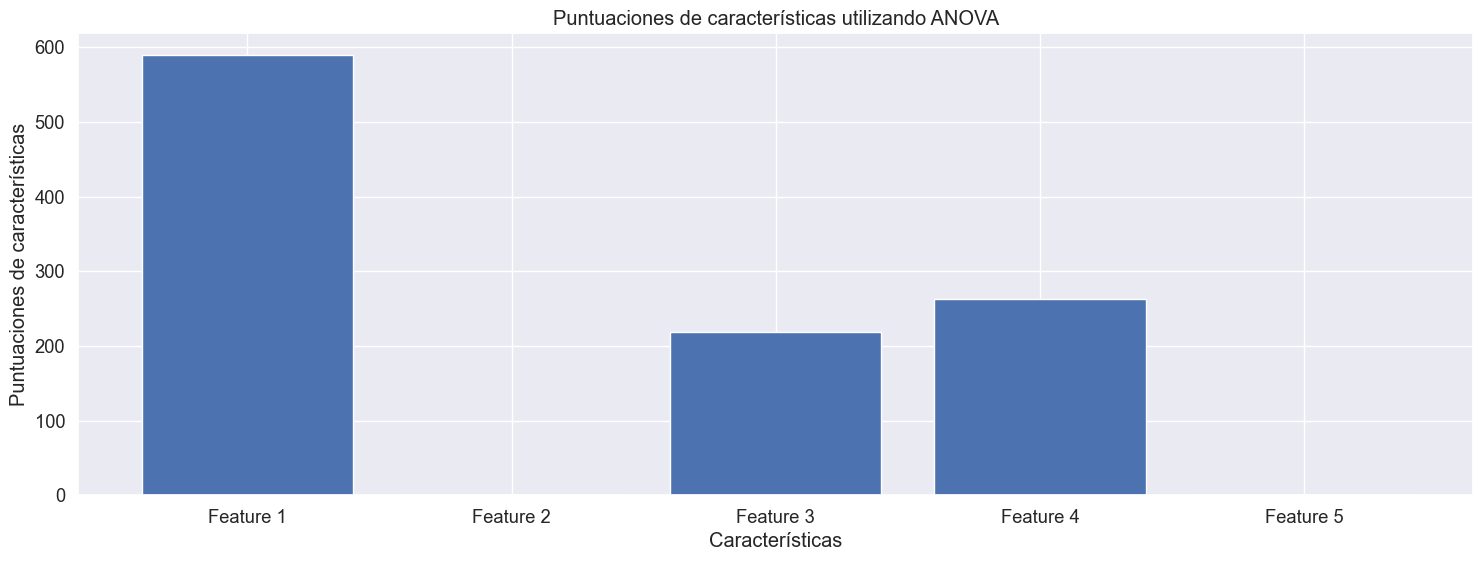

In [122]:
# Se escogen las clases Internauta, Adicional, Monoproducto, Ctacte y Consumo

X = df1_new.loc[:, ["Internauta", "Adicional","Monoproducto","Ctacte","Consumo"]]

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

num_features_to_select = 5
feature_selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Obtener las puntuaciones de características
feature_selector.fit(X_train, y_train)  # Ajusta el selector a los datos de entrenamiento
feature_scores = feature_selector.scores_

# Obtener las características seleccionadas
selected_feature_indices = feature_selector.get_support(indices=True)

print("Puntuaciones de características:")
for feature, score in enumerate(feature_scores):
    print(f"Característica {feature + 1}: {score:.2f}")

print("\nCaracterísticas seleccionadas (índices):", selected_feature_indices)

# Graficar las puntuaciones de características
plt.figure(figsize=(18, 6))
plt.bar(range(len(feature_scores)), feature_scores, tick_label=[f'Feature {i+1}' for i in range(len(feature_scores))])
plt.xlabel('Características')
plt.ylabel('Puntuaciones de características')
plt.title('Puntuaciones de características utilizando ANOVA')
plt.show()

Se calcularon las puntuaciones de características utilizando la prueba ANOVA en un conjunto de datos con las siguientes características: "Internauta," "Adicional," "Monoproducto," "Ctacte," y "Consumo."

# Analisis ROC
El análisis de ROC lo usamos para representación gráfica de la sensibilidad frente a la especificidad del modelo de regresion logistica. La sensibilidad es la proporción de casos positivos que se clasifican correctamente como positivos. La especificidad es la proporción de casos negativos que se clasifican correctamente como negativos.

In [123]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X = df1_new[["Renta_Scaled", "TC", "Dualidad"]]
y = df1_new["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LogisticRegressionSK es el modelo de regresion logistica de la libreria Sklearn
clf = LogisticRegressionSK(max_iter=1000)
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)


AUC: 0.5


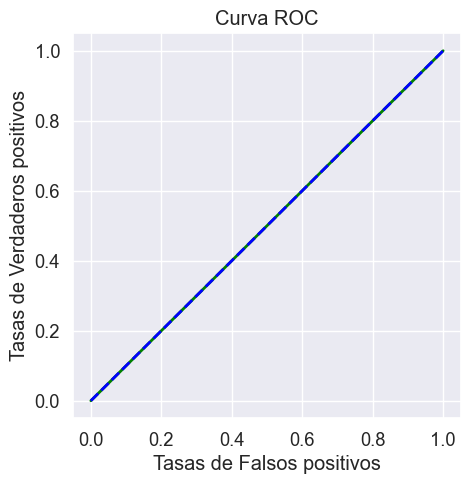

In [124]:
fpr1, tpr1, _ = roc_curve(y_test, y_pred)
roc_auc1 = auc(fpr1, tpr1)

plt.figure(figsize=(5,5))
plt.plot(fpr1, tpr1, color="green", lw=2)

print(f"AUC: {roc_auc1}")
plt.plot([0,1], [0, 1], color="blue", lw=2, linestyle="--")
plt.title("Curva ROC")
plt.xlabel("Tasas de Falsos positivos")
plt.ylabel("Tasas de Verdaderos positivos")
plt.show()